In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nose.tools

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. Data mining process as a whole

### Problem 1. Read the dataset (1 point)
You'll be exploring data about people's income. Your task is to understand whether there are significant differences in the lifestyle of lower- vs. higher-income groups.

Read the dataset located [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data). The information file is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Save it into the variable `income_data`. Change the column names to what you like. The last column is related to the income class.

Get acquainted with the information file well before starting work.

You don't need to clean the dataset.

In [3]:
income_data = pd.read_csv('./DataSets/adult.data', header = None, skipinitialspace=True)

#http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf
#for more information

income_data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
                        'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
                        'hours_per_week', 'native_country', 'salary_label']

income_data.head(5)
#income_data.tail(50)
#income_data['salary_label'].unique()
#income_data.shape
#income_data.dtypes
#income_data.describe().T

#income_data.capital_gain.nlargest(50)
#income_data.capital_gain.unique()

#used to calculate the number of values (used to ckeck values for problem 3)
#condition = income_data['capital_gain'] == 65656
#len(income_data[condition])

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#delete
#very useful it allows us to see the whole DataFrame without limitations
#pd.set_option("display.max_rows", None, "display.max_columns", None)

#names = pd.read_table('../03. Data-Visualization-Exploratory-Data-Analysis-Lab/adult.names')
#names

In [5]:
nose.tools.assert_is_not_none(income_data)

### Problem 2. High income (1 point)
How many people have high income (over 50 000 USD per year)? Write a function to return the value. The function should accept the dataframe as a parameter. Work with that parameter.

In [6]:
def get_num_people_with_high_income(dataframe):
    '''function that returns the number of people,
    who earn more than 50K per year'''
    
    condition = dataframe['salary_label'] == ' >50K'
    num_high_earners = len(dataframe[condition])
    
    return num_high_earners

In [7]:
# This cell contains hidden tests

### Problem 3. Capital gain: thresholding (1 point)
Plot a histogram of the capital gain. You can see that there are many people with relatively low gains and a few people - with very high gains.

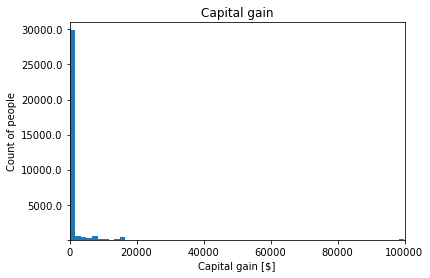

In [8]:
# YOUR CODE HERE

#plt.hist(income_data.index, income_data.capital_gain)
plt.hist(income_data.capital_gain, bins =60)

plt.title('Capital gain')

plt.xlabel('Capital gain [$]')
plt.ylabel('Count of people')

# shows only values between 0 and 100,000 on the X axis
plt.xlim(0, 100000)

# shows only values between 0 and 31,000 on the Y axis
plt.ylim(0,31000)

#shows the ticks on Y
plt.yticks()
old_values = [0. , 5000., 10000., 15000., 20000., 25000., 30000.]
new_values = ['' , 5000., 10000., 15000., 20000., 25000., 30000.]

#changing the yticks in this case removing the double zero
plt.yticks(old_values, new_values)


plt.show()

#We can see that the mojority of the people in this DataFrame (29849 out of 32651) are receiving no capital gain
#There is small proportion of people who get capital gain
#While only 159 of 32561 people are getting $99,999 capital gain

Write a function which accepts a dataframe and a capital gain value (in USD) and returns how many people are there with **greater than or equal to** that threshold gain.

In [9]:
def get_num_people_with_higher_gain(dataframe, threshold_gain):
    '''function that returns the number of people,
    who received capital gain over given threshold'''
    
    condition_1 = income_data['capital_gain'] >= threshold_gain
    threshold_capital = len(income_data[condition_1])
    
    return threshold_capital

In [10]:
nose.tools.assert_equal(get_num_people_with_higher_gain(income_data, 60000), 159)

Create a pie chart of the number of people by marital status.

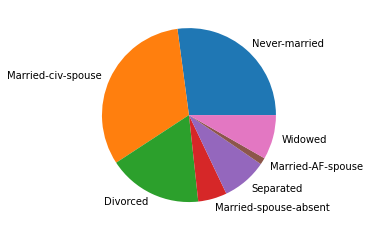

In [11]:
# YOUR CODE HERE
#We can not make the pie plot straight away, because we do not have the values of the categorical variable - maritial_status

def get_num_people_with_marital_status(dataframe):
    '''function that returns the number of people,
    with their marital status'''
    
    #used to get the list of values
    income_data['marital_status'].unique()
    
    list_marital_status = ['Never-married', 'Married-civ-spouse', 'Divorced',
                           'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
                           'Widowed']
    x = []
    for i in range(len(list_marital_status)):   
        condition_3 = dataframe['marital_status'] == list_marital_status[i]
        x.append(len(dataframe[condition_3]))
    return x

#Gets the list of values we need in order to plot the pie plot
marital_status_values = get_num_people_with_marital_status(income_data)
#[10683, 14976, 4443, 418, 1025, 23, 993] - these are the values we get


#Actual plotting - not very representative
#plt.pie(marital_status_values, labels = ['Never-married', 'Married-civ-spouse', 'Divorced',
#                           'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
#                           'Widowed'])


#In the plot above ' Married-AF-spouse' is not very visible,
#so we can alter the data to visualize it better, log() is not very good, sqrt() is better
plt.pie(np.sqrt(marital_status_values), labels = ['Never-married', 'Married-civ-spouse', 'Divorced',
                           'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
                           'Widowed'])


# Make the plot look circular
plt.gca().set_aspect("equal")

plt.show()

### Problem 4. Marital status (2 points)
Which type of marital status is the most prominent (i.e. has the most people)? How many are there? Write a function that **calculates and returns the two answers**. 

In [12]:
def most_prominent_marital_status(dataframe):
    '''function that returns the max number of people,
    with their marital status'''

    
    #used to get the list of values
    income_data['marital_status'].unique()
    
    list_marital_status_1 = ['Never-married', 'Married-civ-spouse', 'Divorced',
                           'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
                           'Widowed']
    
    num_people = 0
    status = ''
    for i in range(len(list_marital_status_1)):
        condition_4 = dataframe['marital_status'] == list_marital_status_1[i]
        if num_people < len(dataframe[condition_4]):
            num_people = len(dataframe[condition_4])
            status= list_marital_status_1[i]

    return (status, num_people)

In [13]:
(status, num_people) = most_prominent_marital_status(income_data)
nose.tools.assert_not_equal(status, "")
nose.tools.assert_greater(num_people, 10000)

### Problem 5. Age groups (1 point)
Create a histogram of all people's ages. Use the default settings. Add the label "Age" on the x-axis and "Count" on the y-axis.

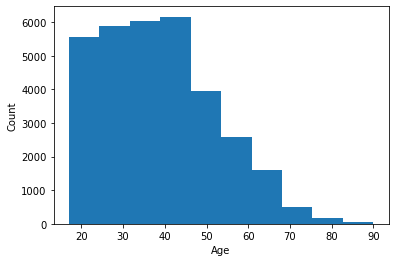

In [14]:
# YOUR CODE HERE

plt.hist(income_data['age'])

plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

#The plot below shows the distribution of people's ages that took part in the survey
#We can see that the mojority of them is around 30-40 years old.
#Please Note: the plot is left intentionally without Title and other modifications
#as per the task

Let's get another view of the data. Split the ages into three:
1. Young people: $\text{age} \le 30$
2. Middle-aged people: $30 < \text{age} \le 60$
3. Old people: $60 < \text{age}$

Return the counts in the following function. Which age group has the most people? How many are there?

In [15]:
def get_num_people_by_age_category(dataframe):
    """this function runs throughout the whole 'age' column
    and calculates the number of people who belong to different age groups"""
    
    young, middle_aged, old = (0, 0, 0)
    
    for i in range(len(income_data['age'])):
        if income_data['age'].loc[i] <= 30:
            young += 1
        if 30 < income_data['age'].loc[i] <= 60:
             middle_aged += 1
        if income_data['age'].loc[i] > 60:
            old += 1
    return young, middle_aged, old

#let's check that it is working as we want it to
#first let's see that it gives the total amount of people:
#total_people = young + middle_aged + old
#assert (total_people) == len(income_data['age'])

#second check - is the number of people aged below and equal to 30 equal to 10572?
#it can be altered in order to check and the other age groups (10572, 19657, 2332)
#assert (income_data['age'][income_data['age'] <=30].count() == 10572)

In [16]:
young, middle_aged, old = get_num_people_by_age_category(income_data)
nose.tools.assert_greater(young, 0)
nose.tools.assert_greater(middle_aged, 0)
nose.tools.assert_greater(old, 0)

Now we can create a bar chart. Execute the code below to see it.

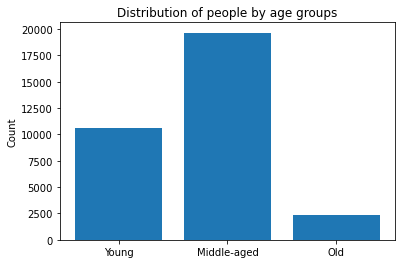

In [17]:
plt.title("Distribution of people by age groups")
plt.bar(range(3), [young, middle_aged, old])
plt.xticks(range(3), ["Young", "Middle-aged", "Old"])
plt.ylabel("Count")
plt.show()

### Problem 6. Native country (2 points)
Have a look at the native country of the people. The highest number of people are, as expected, from the US. What country makes for **the second highest** number of people? How many are they? Write a function to **calculate** and return the answer given a dataframe. DO NOT hardcode the answer, e.g. `return "Germany"`.

In [18]:
def get_second_highest_num_people(dataframe):
    
    #instantiating the main variables that we want to return
    num_people, country = 0, ""
    
    #PART 1
    #this condition gives the unique values for 'native_country' column
    condition_6 = income_data['native_country']
    income_data['native_country'].unique()

    #this variable shows all the unique values for 'native_country'
    coutries_list = ['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
                   'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada',
                   'Germany', 'Iran', 'Philippines', 'Italy', 'Poland',
                   'Columbia', 'Cambodia', 'Thailand', 'Ecuador', 'Laos',
                   'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic',
                   'El-Salvador', 'France', 'Guatemala', 'China', 'Japan',
                   'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)', 'Scotland',
                   'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam', 'Hong',
                   'Ireland', 'Hungary', 'Holand-Netherlands']

    #resident_by_countries will store the number of people by country, 
    #for example, number of English people who took part in the survey
    resident_by_countries = []
    for i in range(len(income_data['native_country'].unique())):   
        condition_6 = income_data['native_country'] == coutries_list[i]
        resident_by_countries.append(len(income_data[condition_6]))
    #sum(resident_by_countries) #check to see if we get the sum of all people who took part

    #PART 2
    #the following chunck is taken from the link below
    #https://www.geeksforgeeks.org/python-program-to-find-second-largest-number-in-a-list/
    #mx is the biggest number, num_people is the second biggest (the one we need)
    #this chunk compares the first 2 elements of the list compares them and assigns them
    #in other words this bit finds the second biggest element of the list
    mx=max(resident_by_countries[0],resident_by_countries[1])
    #for convinience I name num_people to be the secondmax value
    num_people=min(resident_by_countries[0],resident_by_countries[1])
    n = len(resident_by_countries)
    
    for i in range(2,n):
        if resident_by_countries[i]>mx:  
            num_people=mx 
            mx=resident_by_countries[i]
        elif resident_by_countries[i]>num_people and mx != resident_by_countries[i]:
            num_people=resident_by_countries[i]
    
    
    #PART 3
    #this chunk of code finds the corresponding id for the second biggest element of the list
    id_country = 0
    for i in range(len(resident_by_countries)):
        if num_people == resident_by_countries[i]:
            id_country = i
    country = coutries_list[id_country]
    country , num_people    
    
    return num_people, country


#get_second_highest_num_people(income_data)

#for manual check
#resident_by_countries

In [19]:
num_people, country = get_second_highest_num_people(income_data)
nose.tools.assert_greater(num_people, 0)
nose.tools.assert_not_equal(country, "")

### Problem 7. Busiest occupations (2 points)
Which people are most overworked? Group all data by occupation and calculate the mean hours per week for each group.

Write a function that **calculates and returns** all mean hours per week as a `Series`. Sort the results in descending order (most hours to fewest hours).

In [20]:
def get_mean_working_hours_by_income(dataframe):
    df = dataframe.groupby('occupation')['hours_per_week'].mean().sort_values(ascending = False)
    return df.round(2)  

#hours = get_mean_working_hours_by_income(income_data)
#hours

#checks if 'df' is Series
#if isinstance(hours, pd.Series):
#    print(1)
#else:
#    print(0)

In [21]:
hours = get_mean_working_hours_by_income(income_data)
print(hours)
nose.tools.assert_almost_equal(hours["Handlers-cleaners"], 37.95, delta = 0.01)

occupation
Farming-fishing      46.99
Exec-managerial      44.99
Transport-moving     44.66
Protective-serv      42.87
Prof-specialty       42.39
Craft-repair         42.30
Sales                40.78
Machine-op-inspct    40.76
Armed-Forces         40.67
Tech-support         39.43
Handlers-cleaners    37.95
Adm-clerical         37.56
Other-service        34.70
Priv-house-serv      32.89
?                    31.91
Name: hours_per_week, dtype: float64


Finally, let's plot a bar chart. Check the values carefully. If your do not match, feel free to edit the chart generation code below.

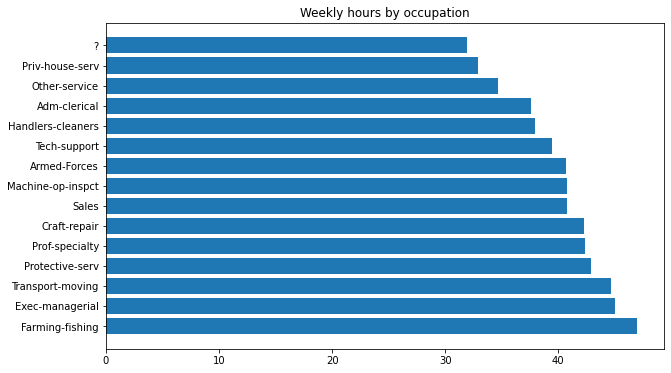

In [22]:
plt.figure(figsize = (10, 6))
plt.title("Weekly hours by occupation")
plt.barh(range(len(hours)), hours)
plt.yticks(list(range(len(hours))), hours.index)
plt.show()